In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adrijaroy45","key":"8c1f7b57a58d730ac51b1c98e782bf03"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!pip install kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [4]:
!chmod 600 /content/kaggle.json

In [5]:
!kaggle datasets download -d preetviradiya/covid19-radiography-dataset

Dataset URL: https://www.kaggle.com/datasets/preetviradiya/covid19-radiography-dataset
License(s): GPL-2.0


In [6]:
import zipfile
with zipfile.ZipFile('covid19-radiography-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [7]:
import os
os.listdir('/content')


['.config',
 'COVID-19_Radiography_Dataset',
 'metadata.csv',
 'covid19-radiography-dataset.zip',
 'kaggle.json',
 'sample_data']

In [8]:
import pandas as pd
df = pd.read_csv('/content/metadata.csv')
print(df.head())  # To preview the first few rows of the data


   Unnamed: 0       file_name  \
0           0     COVID-1.png   
1           1    COVID-10.png   
2           2   COVID-100.png   
3           3  COVID-1000.png   
4           4  COVID-1001.png   

                                image_data_grayscale file_format image_shape  \
0  [[185  40   0 ...   0  24 131]\n [ 75  14   0 ...         PNG  (299, 299)   
1  [[135 133 131 ...  24  21  19]\n [132 130 129 ...         PNG  (299, 299)   
2  [[ 62  10   0 ... 197 200 209]\n [ 35   6   0 ...         PNG  (299, 299)   
3  [[162 162 162 ...   4   4   5]\n [ 26  26  26 ...         PNG  (299, 299)   
4  [[  0   0   0 ...   0   0   0]\n [  0   0   0 ...         PNG  (299, 299)   

   label  
0  COVID  
1  COVID  
2  COVID  
3  COVID  
4  COVID  


In [9]:
print(df.head())  #Tabular data


   Unnamed: 0       file_name  \
0           0     COVID-1.png   
1           1    COVID-10.png   
2           2   COVID-100.png   
3           3  COVID-1000.png   
4           4  COVID-1001.png   

                                image_data_grayscale file_format image_shape  \
0  [[185  40   0 ...   0  24 131]\n [ 75  14   0 ...         PNG  (299, 299)   
1  [[135 133 131 ...  24  21  19]\n [132 130 129 ...         PNG  (299, 299)   
2  [[ 62  10   0 ... 197 200 209]\n [ 35   6   0 ...         PNG  (299, 299)   
3  [[162 162 162 ...   4   4   5]\n [ 26  26  26 ...         PNG  (299, 299)   
4  [[  0   0   0 ...   0   0   0]\n [  0   0   0 ...         PNG  (299, 299)   

   label  
0  COVID  
1  COVID  
2  COVID  
3  COVID  
4  COVID  


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN Model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  #Explicit Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes: Normal, Lung Opacity, Pneumonia
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

img_size = 128  # 128x128 images

# Directories for training and validation data
train_directory = "/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"
test_directory = "/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"

# Use ImageDataGenerator to load images in batches
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directories and perform data augmentation
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(img_size, img_size),
    batch_size=16,
    classes=['COVID', 'Normal', 'Viral Pneumonia'], # Explicitly specify class subdirectories
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=(img_size, img_size),
    batch_size=16,
    classes=['COVID', 'Normal', 'Viral Pneumonia'], # Explicitly specify class subdirectories
    class_mode='sparse')  # Use sparse for integer labels

Found 15153 images belonging to 3 classes.
Found 15153 images belonging to 3 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten is not necessary here if using GlobalAveragePooling2D
    layers.GlobalAveragePooling2D(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes: Normal, Lung Opacity, Pneumonia
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Train the Model with Different Epochs(8,12,15) and Check Testing Accuracy.

In [13]:
# List of epochs to test
epochs_list = [8, 12, 15]

# Train the model with different epochs and check accuracy
for epoch in epochs_list:
    print(f"Training with {epoch} epochs")

    # Train the model
    history = model.fit(train_generator, epochs=epoch, validation_data=test_generator)

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Print the test accuracy for this epoch
    print(f"Test Accuracy after {epoch} epochs: {test_accuracy}")


Training with 8 epochs


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.6733 - loss: 0.7850 - val_accuracy: 0.7104 - val_loss: 0.6082
Epoch 2/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.7313 - loss: 0.5652 - val_accuracy: 0.7947 - val_loss: 0.4565
Epoch 3/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 72s 76ms/step - accuracy: 0.8109 - loss: 0.4446 - val_accuracy: 0.8588 - val_loss: 0.3511
Epoch 4/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.8606 - loss: 0.3420 - val_accuracy: 0.9024 - val_loss: 0.2661
Epoch 5/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.8904 - loss: 0.2815 - val_accuracy: 0.9130 - val_loss: 0.2370
Epoch 6/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 72s 76ms/step - accuracy: 0.9142 - loss: 0.2314 - val_accuracy: 0.9192 - val_loss: 0.2069
Epoch 7/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 72s 76ms/step - accuracy: 0.9271 - loss: 0.1978 - val_accuracy: 0.9289 - val_loss: 0.1938
Epoch 8/8
948/948 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9347 - loss: 0.1765 - val_accu

Plotting the training and validation accuracy for each epoch.

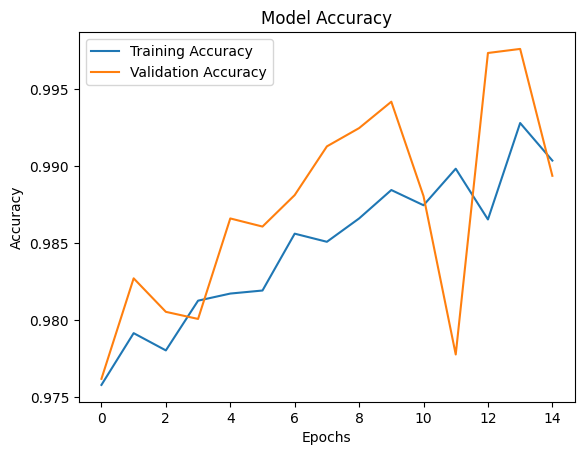

In [14]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
import numpy as np
# Make predictions on the test dataset
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Print classification report (precision, recall, sensitivity)
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, y_pred_classes, target_names=["Lung Opacity", "Normal", "Viral Pneumonia"]))

948/948 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step
                 precision    recall  f1-score   support

   Lung Opacity       0.24      0.23      0.23      3616
         Normal       0.67      0.68      0.68     10192
Viral Pneumonia       0.08      0.08      0.08      1345

       accuracy                           0.52     15153
      macro avg       0.33      0.33      0.33     15153
   weighted avg       0.52      0.52      0.52     15153



Testing The model.(With Lebels and Accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


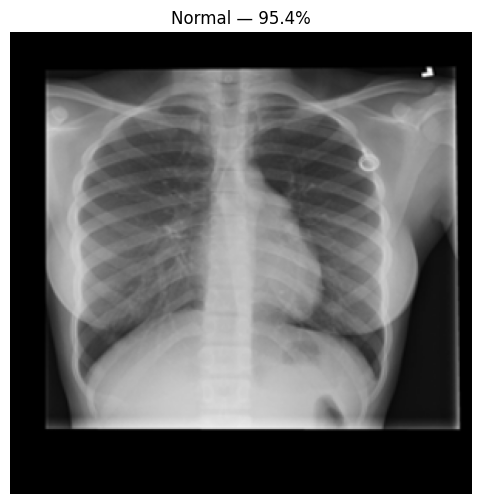

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Load a sample test image
img_path = "/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/Normal/Normal-1.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Preprocess just as you did for training (resize/normalize)
input_img = cv2.resize(img_rgb, (224, 224)) / 255.0
input_batch = np.expand_dims(input_img, axis=0)

# 3. Get model prediction
preds = model.predict(input_batch)[0]
pred_class = np.argmax(preds)
confidence = preds[pred_class]

# Map index → human-readable label
labels = ["Lung Opacity", "Normal", "Viral Pneumonia"]
label_text = labels[pred_class]

#  Plot with title annotation
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title(f"{label_text} — {confidence*100:.1f}%")
plt.axis('off')
plt.show()
